In [58]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import ast

In [59]:
#Initial inspection


df = pd.read_csv(r"..\data\raw\gutendex-raw-dataset.csv")
print(df.shape)
print(df.info())
df.head()

(10000, 44)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 44 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   id                                        10000 non-null  int64 
 1   title                                     10000 non-null  object
 2   authors                                   10000 non-null  object
 3   summaries                                 10000 non-null  object
 4   editors                                   10000 non-null  object
 5   translators                               10000 non-null  object
 6   subjects                                  10000 non-null  object
 7   bookshelves                               10000 non-null  object
 8   languages                                 10000 non-null  object
 9   copyright                                 10000 non-null  bool  
 10  media_type                         

,id,title,authors,summaries,editors,translators,subjects,bookshelves,languages,copyright,...,formats.text/rtf,formats.audio/midi,formats.video/mpeg,formats.video/x-flv,formats.text/xml,formats.application/x-musescore,formats.image/png,formats.video/x-msvideo,formats.text/html; charset=windows-1252,formats.text/plain; charset=windows-1252
0,84,"Frankenstein; or, the modern prometheus","[{'name': 'Shelley, Mary Wollstonecraft', 'bir...","['""Frankenstein; Or, The Modern Prometheus"" by...",[],[],"[""Frankenstein's monster (Fictitious character...","['Category: British Literature', 'Category: Cl...",['en'],False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2701,"Moby Dick; Or, The Whale","[{'name': 'Melville, Herman', 'birth_year': 18...","['""Moby Dick; Or, The Whale"" by Herman Melvill...",[],[],"['Adventure stories', 'Ahab, Captain (Fictitio...","['Best Books Ever Listings', 'Category: Advent...",['en'],False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1342,Pride and Prejudice,"[{'name': 'Austen, Jane', 'birth_year': 1775, ...","['""Pride and Prejudice"" by Jane Austen is a no...",[],[],"['Courtship -- Fiction', 'Domestic fiction', '...","['Best Books Ever Listings', 'Category: Britis...",['en'],False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1513,Romeo and Juliet,"[{'name': 'Shakespeare, William', 'birth_year'...","['""Romeo and Juliet"" by William Shakespeare is...",[],[],"['Conflict of generations -- Drama', 'Juliet (...","['Category: British Literature', 'Category: Cl...",['en'],False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,26184,Simple Sabotage Field Manual,[{'name': 'United States. Office of Strategic ...,"['""Simple Sabotage Field Manual"" by United Sta...",[],[],['Sabotage'],"['Category: History - Modern (1750+)', 'Catego...",['en'],False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
#NaN value review for columns

nan_count = df.isna().sum()
nan_percent = (df.isna().sum() / len(df)) * 100

nan_summary = pd.DataFrame({
    "NaN_Count": nan_count,
    "NaN_Percentage": nan_percent
})

print(nan_summary.sort_values(by="NaN_Percentage", ascending=False))


                                          NaN_Count  NaN_Percentage
formats.text/plain; charset=windows-1252       9999           99.99
formats.text/xml                               9999           99.99
formats.text/html; charset=windows-1252        9999           99.99
formats.video/x-msvideo                        9999           99.99
formats.video/x-flv                            9999           99.99
formats.video/mpeg                             9998           99.98
formats.image/png                              9997           99.97
formats.image/gif                              9997           99.97
formats.application/x-musescore                9996           99.96
formats.text/rtf                               9995           99.95
formats.audio/midi                             9991           99.91
formats.text/plain                             9976           99.76
formats.application/msword                     9976           99.76
formats.application/prs.tex                    9

In [61]:
#Missing values in tuple

df['missing_per_row'] = df.isna().sum(axis=1)

print(df['missing_per_row'].describe())
print(df[df['missing_per_row'] > 3])

count    10000.000000
mean        24.381600
std          0.655305
min         20.000000
25%         24.000000
50%         24.000000
75%         25.000000
max         28.000000
Name: missing_per_row, dtype: float64
         id                                              title  \
0        84            Frankenstein; or, the modern prometheus   
1      2701                           Moby Dick; Or, The Whale   
2      1342                                Pride and Prejudice   
3      1513                                   Romeo and Juliet   
4     26184                       Simple Sabotage Field Manual   
...     ...                                                ...   
9995  29306  Afloat on the Ohio: An Historical Pilgrimage o...   
9996  33786              Readings from Latin Verse; With Notes   
9997  35687                     History of American Socialisms   
9998  36675  Scenes and Adventures in the Semi-Alpine Regio...   
9999  36690                                          Anarchi

In [62]:
#Descriptive Statistics

print(df.describe())

                 id  download_count  missing_per_row
count  10000.000000    10000.000000     10000.000000
mean   34131.487700     1921.694900        24.381600
std    21919.539923     3733.462425         0.655305
min        1.000000      721.000000        20.000000
25%    16106.750000      878.000000        24.000000
50%    34226.500000     1169.000000        24.000000
75%    49806.500000     1829.250000        25.000000
max    77929.000000   150546.000000        28.000000


In [63]:
#Outliers

numeric_cols = df.select_dtypes(include=['int64','float64']).columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)]
    
    print(f"{col} - Outliers:", len(outliers))



id - Outliers: 0
download_count - Outliers: 950
missing_per_row - Outliers: 177


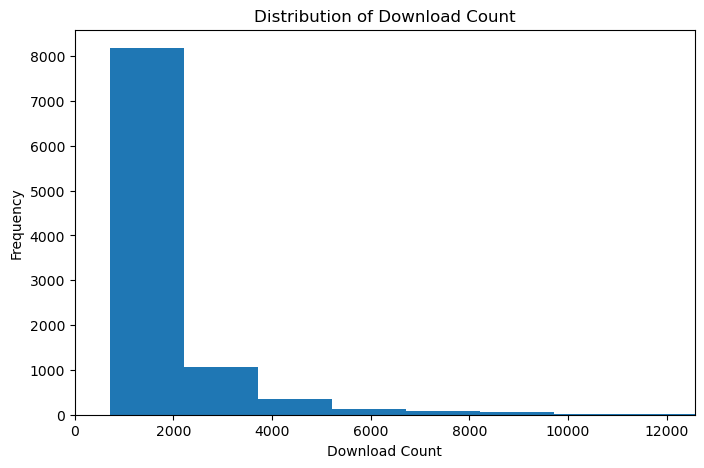

Mode: 722
Skewness: 16.267916165258857


In [64]:
#Plot for outliers to observe right skewness

plt.figure(figsize=(8,5))
plt.hist(df['download_count'], bins=100)
plt.xlabel("Download Count")
plt.ylabel("Frequency")
plt.title("Distribution of Download Count")
plt.xlim(0, df['download_count'].quantile(0.99))
plt.show()
print("Mode:", df['download_count'].mode()[0])
print("Skewness:", df['download_count'].skew())


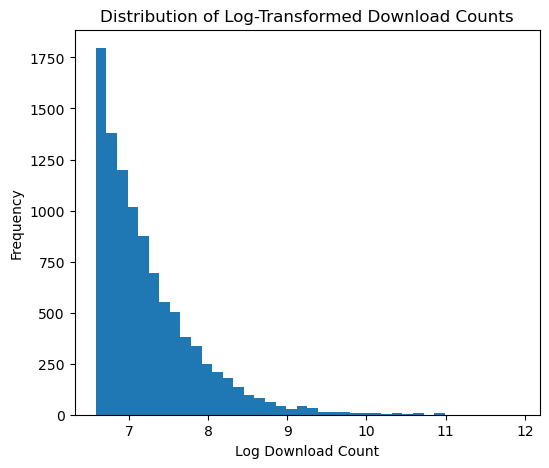

In [65]:
plt.figure(figsize=(6,5))
plt.hist(np.log1p(df['download_count']), bins=40)
plt.xlabel("Log Download Count")
plt.ylabel("Frequency")
plt.title("Distribution of Log-Transformed Download Counts")
plt.show()

In [66]:
#Data cleaning by dropping useless columns

raw_df=pd.read_csv(r"..\data\raw\gutendex-raw-dataset.csv")
df=raw_df.copy()

nan_percent = (df.isna().sum() / len(df)) * 100
cols_to_drop = nan_percent[nan_percent > 95].index
df = df.drop(columns=cols_to_drop)

print(df.shape)

(10000, 20)


In [67]:
#Recheck of missing columns

nan_count = df.isna().sum()
nan_percent = (df.isna().sum() / len(df)) * 100

nan_summary = pd.DataFrame({
    "NaN_Count": nan_count,
    "NaN_Percentage": nan_percent
})

print(nan_summary.sort_values(by="NaN_Percentage", ascending=False))

                                        NaN_Count  NaN_Percentage
formats.text/plain; charset=utf-8            4392           43.92
formats.text/plain; charset=us-ascii          484            4.84
formats.application/x-mobipocket-ebook        268            2.68
formats.application/epub+zip                  268            2.68
formats.application/octet-stream              152            1.52
formats.text/html                              31            0.31
title                                           0            0.00
formats.image/jpeg                              0            0.00
formats.application/rdf+xml                     0            0.00
download_count                                  0            0.00
id                                              0            0.00
copyright                                       0            0.00
languages                                       0            0.00
bookshelves                                     0            0.00
subjects  

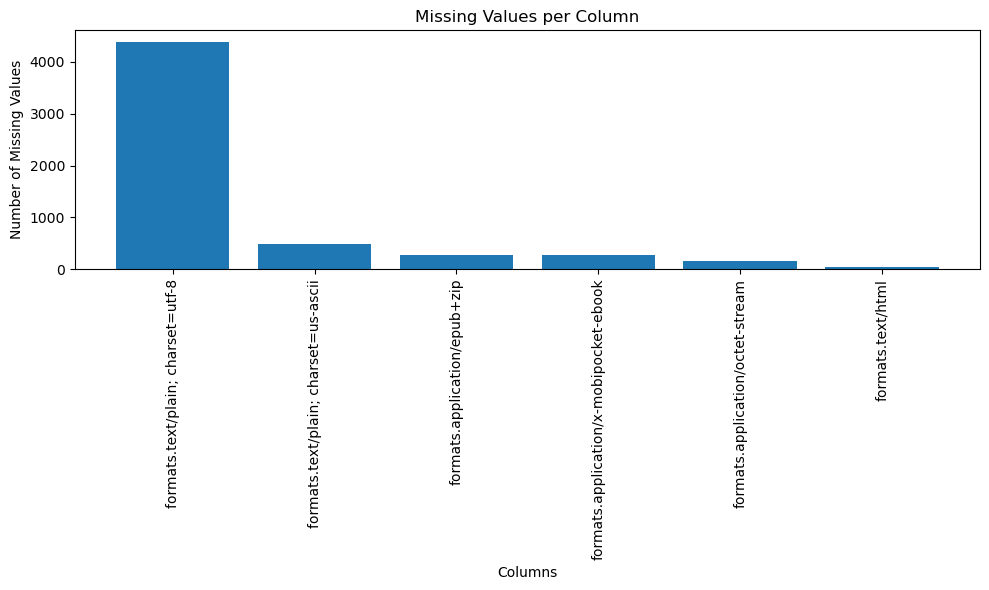

In [68]:
#Visualizing missing column values

missing_counts = df.isna().sum()
missing_counts = missing_counts[missing_counts > 0].sort_values(ascending=False)

plt.figure(figsize=(10,6))
plt.bar(missing_counts.index, missing_counts.values)
plt.xticks(rotation=90)
plt.xlabel("Columns")
plt.ylabel("Number of Missing Values")
plt.title("Missing Values per Column")
plt.tight_layout()
plt.show()


In [69]:
#Recheck of missing values

df['missing_per_row'] = df.isna().sum(axis=1)

print(df['missing_per_row'].describe())
print(df[df['missing_per_row'] > 0])

count    10000.000000
mean         0.559500
std          0.739131
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          6.000000
Name: missing_per_row, dtype: float64
         id                                              title  \
0        84            Frankenstein; or, the modern prometheus   
1      2701                           Moby Dick; Or, The Whale   
2      1342                                Pride and Prejudice   
10    37106           Little Women; Or, Meg, Jo, Beth, and Amy   
11     2554                               Crime and Punishment   
...     ...                                                ...   
9984  65610  Il Lago di Como e il Pian d'Erba: Escursioni a...   
9989  20205  The Maya Chronicles: Brinton's Library Of Abor...   
9997  35687                     History of American Socialisms   
9998  36675  Scenes and Adventures in the Semi-Alpine Regio...   
9999  36690                                          Anarchi

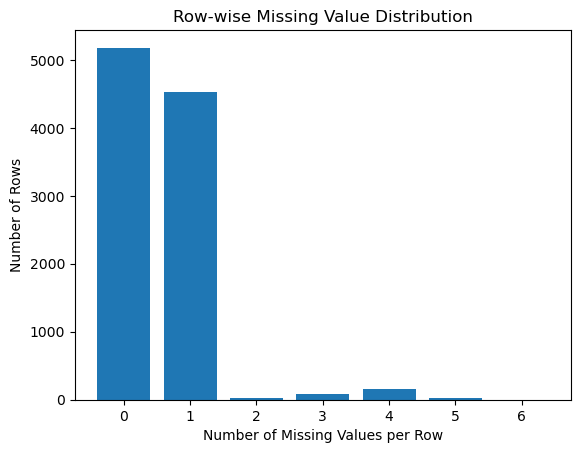

In [70]:
#Visualising missing row values

missing_per_row = df.isna().sum(axis=1)
missing_counts = missing_per_row.value_counts().sort_index()

plt.bar(missing_counts.index, missing_counts.values)
plt.xlabel("Number of Missing Values per Row")
plt.ylabel("Number of Rows")
plt.title("Row-wise Missing Value Distribution")
plt.show()

In [71]:
#Removing redundant columns i.e cols with formats and missing_per_row.

format_cols = [col for col in df.columns if col.startswith("formats.")]
format_cols.extend(['missing_per_row'])

df = df.drop(columns=format_cols)

df = df.reset_index(drop=True)

print("New dataset shape:", df.shape)

df.to_csv(r"..\data\processed\gutendex-cleaned-dataset_v1.csv", index=False)


New dataset shape: (10000, 12)


In [72]:
#Missing values for object datatype

object_cols = df.select_dtypes(include='object').columns

empty_counts = {}

for col in object_cols:
    empty_count = (df[col] == "[]").sum()
    if empty_count > 0:
        print(col, ":", empty_count, "(", round((empty_count/len(df))*100,2), "% )")

authors : 679 ( 6.79 % )
summaries : 498 ( 4.98 % )
editors : 8638 ( 86.38 % )
translators : 8814 ( 88.14 % )
subjects : 13 ( 0.13 % )
bookshelves : 400 ( 4.0 % )


In [73]:
#Encoding for observing variance

copyright_encoded = df['copyright'].astype(int)
print("Copyright variance:", np.var(copyright_encoded))

media_encoded = df['media_type'].astype('category').cat.codes
print("Media_type variance:", np.var(media_encoded))

print(df['copyright'].value_counts(normalize=True))
print(df['media_type'].value_counts(normalize=True))


Copyright variance: 0.009115359999998294
Media_type variance: 0.09351516000000001
copyright
False    0.9908
True     0.0092
Name: proportion, dtype: float64
media_type
Text           0.9761
Sound          0.0237
StillImage     0.0001
MovingImage    0.0001
Name: proportion, dtype: float64


In [74]:
#Columns being dropped

df=df.drop(columns=['editors','translators','copyright','media_type'])


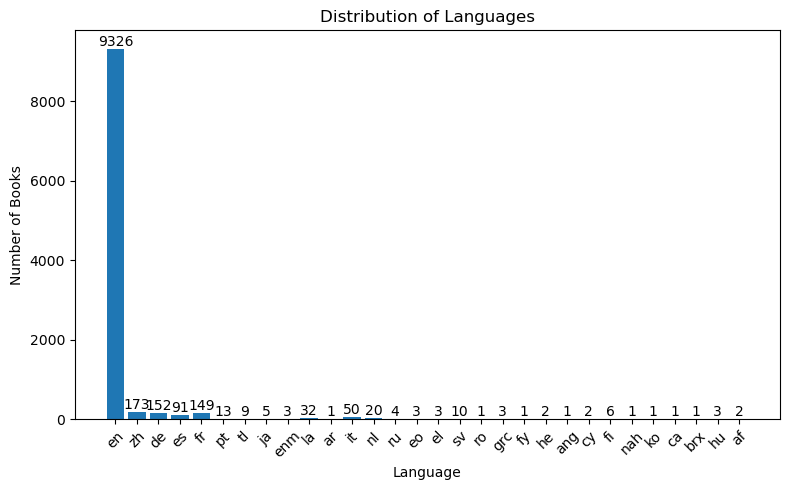

In [75]:
#Language distribution graph

all_languages = []

for entry in df['languages']:
    entry = str(entry).strip("[]")
    items = entry.split(',')
    for item in items:
        cleaned = item.strip().strip("'").strip('"')
        if cleaned != "":
            all_languages.append(cleaned)

language_counts = Counter(all_languages)

labels = list(language_counts.keys())
values = list(language_counts.values())

plt.figure(figsize=(8,5))
plt.bar(labels, values)
plt.xticks(rotation=45)
plt.xlabel("Language")
plt.ylabel("Number of Books")
plt.title("Distribution of Languages")
for i in range(len(labels)):
    plt.text(i, values[i], str(values[i]), ha='center', va='bottom')
plt.tight_layout()
plt.show()


In [76]:
#Language based filtering

df = df[df['languages'].str.contains("'en'")]
df = df.reset_index(drop=True)

df = df.drop(columns=['languages'],errors='ignore')
df.to_csv(r"..\data\processed\gutendex-cleaned-dataset_v2.csv",index=False)

print(df.shape)

(9326, 7)


Total unique shelves: 280


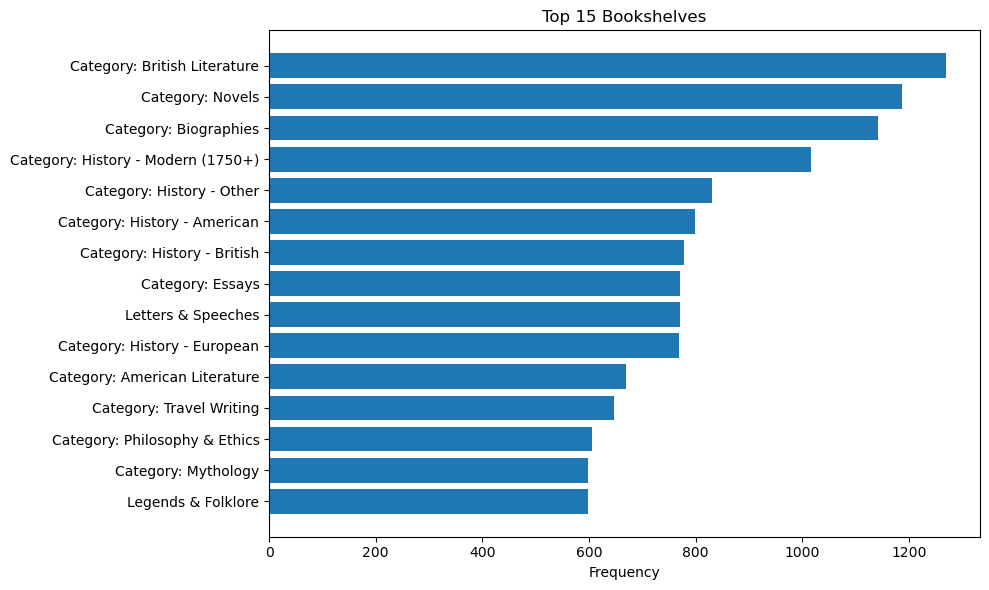

In [77]:
#Grpah for bookshelves

all_shelves = []

for entry in df['bookshelves']:
    entry = str(entry).strip("[]")
    items = entry.split(',')
    for item in items:
        cleaned = item.strip().strip("'").strip('"')
        if cleaned != "":
            all_shelves.append(cleaned)

shelf_counts = Counter(all_shelves)
print("Total unique shelves:", len(shelf_counts))
top_shelves = shelf_counts.most_common(15)

labels = [x[0] for x in top_shelves]
values = [x[1] for x in top_shelves]

plt.figure(figsize=(10,6))
plt.barh(labels[::-1], values[::-1])
plt.xlabel("Frequency")
plt.title("Top 15 Bookshelves")
plt.tight_layout()
plt.show()


Total unique authors: 7958


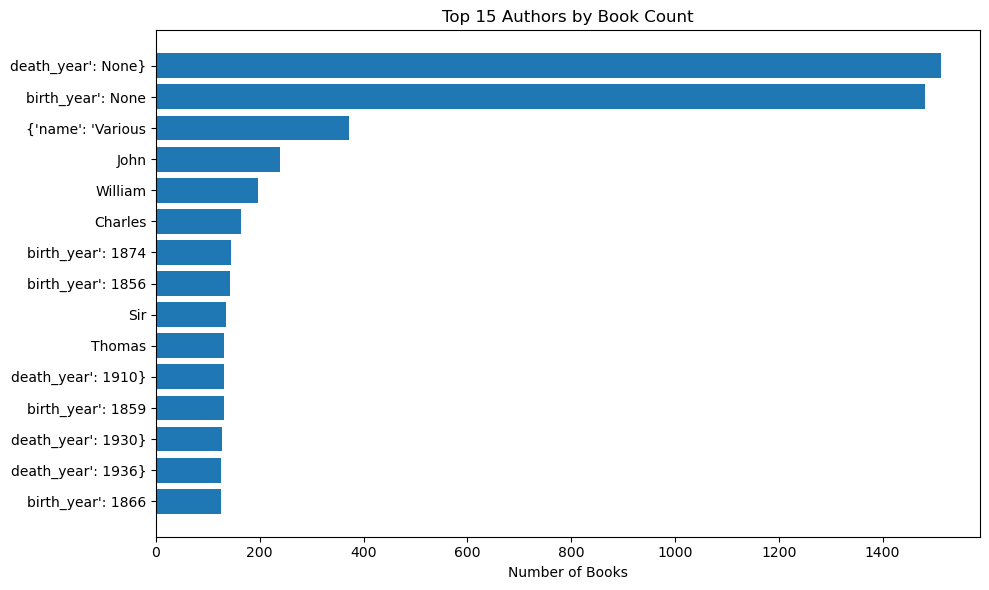

In [78]:
#Graph attemp for authors

all_authors = []

for entry in df['authors']:
    entry = str(entry).strip("[]")
    items = entry.split(',')
    for item in items:
        cleaned = item.strip().strip("'").strip('"')
        if cleaned != "":
            all_authors.append(cleaned)

author_counts = Counter(all_authors)
print("Total unique authors:", len(author_counts))
top_authors = author_counts.most_common(15)

labels = [x[0] for x in top_authors]
values = [x[1] for x in top_authors]

plt.figure(figsize=(10,6))
plt.barh(labels[::-1], values[::-1])
plt.xlabel("Number of Books")
plt.title("Top 15 Authors by Book Count")
plt.tight_layout()
plt.show()


In [79]:
#Cleaning author column

def clean_authors(text):
    try:
        if isinstance(text, str):
            parsed = ast.literal_eval(text)
            if isinstance(parsed, list):
                return " ".join(
                    item.get('name', '')
                    for item in parsed
                    if isinstance(item, dict)
                )
    except:
        pass
    return ""

df['authors'] = df['authors'].apply(clean_authors)



In [80]:
#Cleaning other text columns

def clean_list_column(text):
    try:
        if isinstance(text, str):
            parsed = ast.literal_eval(text)
            if isinstance(parsed, list):
                return " ".join(str(item) for item in parsed)
    except:
        pass
    return ""

df['summaries'] = df['summaries'].apply(clean_list_column)
df['subjects'] = df['subjects'].apply(clean_list_column)
df['bookshelves'] = df['bookshelves'].apply(clean_list_column)


In [81]:
#Final dataset for transformation


print(df.columns)
print(df.shape)
df.to_csv(r"..\data\processed\gutendex-cleaned-dataset_v3.csv", index=False)

Index(['id', 'title', 'authors', 'summaries', 'subjects', 'bookshelves',
       'download_count'],
      dtype='object')
(9326, 7)


Total unique authors: 4697


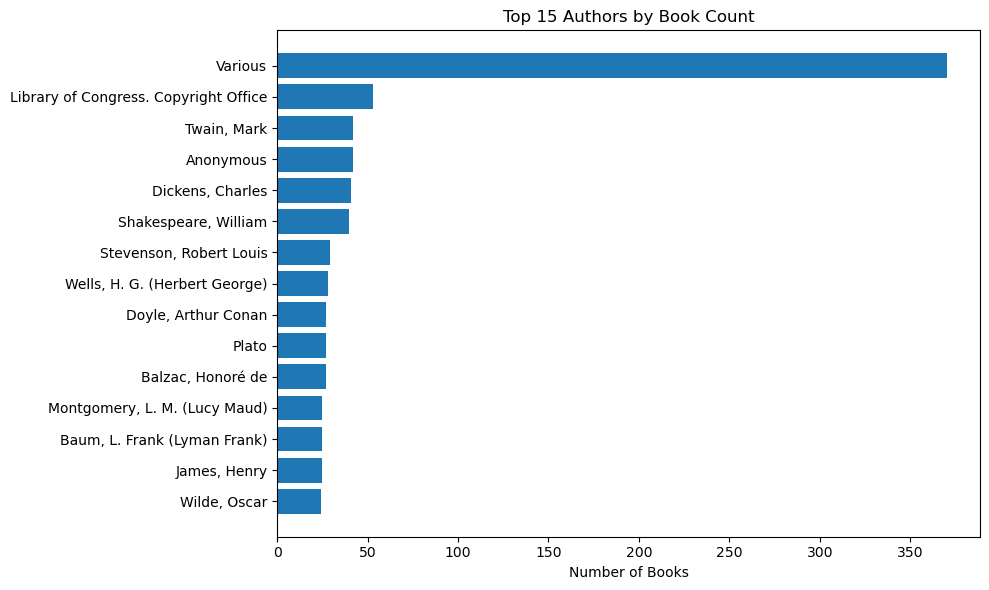

In [82]:
#Verifying author distribution

all_authors = []

for entry in df['authors']:
        cleaned = entry.strip().strip("'").strip('"')
        if cleaned != "":
            all_authors.append(cleaned)

author_counts = Counter(all_authors)
print("Total unique authors:", len(author_counts))
top_authors = author_counts.most_common(15)

labels = [x[0] for x in top_authors]
values = [x[1] for x in top_authors]

plt.figure(figsize=(10,6))
plt.barh(labels[::-1], values[::-1])
plt.xlabel("Number of Books")
plt.title("Top 15 Authors by Book Count")
plt.tight_layout()
plt.show()


In [83]:
dup_books = df[df.duplicated(subset=['title','authors'], keep=False)]
dup_books = dup_books.sort_values(['title','authors'])

dup_books[['id','title','authors','download_count']].head(20)
print(len(dup_books))

324


In [84]:
df = df.sort_values('download_count', ascending=False)
df = df.drop_duplicates(subset=['title','authors'], keep='first')
df = df.reset_index(drop=True)

print("New dataset shape:", df.shape)
df.to_csv(r"..\data\processed\gutendex-cleaned-dataset_v3.csv", index=False)

New dataset shape: (9149, 7)
